# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 16.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
441177,0.0757,0.0024,0.0024,0.0391,0.0073,0.1270,0.2026,0.6519,0.0073,0.1074,4,4,22,22
46034,0.6201,0.2124,0.0293,0.0049,0.0024,0.0122,0.7178,0.6543,0.0781,0.2295,5,5,6,6
363387,0.4468,0.0024,0.0024,0.0024,0.0024,0.0513,0.1514,0.2661,0.0024,0.1587,3,0,14,0
93113,0.3125,0.0122,1.3770,0.0439,0.0024,0.0024,0.0977,0.2783,0.0952,0.1172,1,1,12,12
224122,1.0132,0.5444,0.1660,0.1440,0.0854,0.2319,2.7002,0.8228,0.2832,1.0303,7,7,15,15


In [3]:
raw_data.shape

(456828, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456828 entries, 0 to 456827
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          456828 non-null  float64
 1   Emg2          456828 non-null  float64
 2   Emg3          456828 non-null  float64
 3   Emg4          456828 non-null  float64
 4   Emg5          456828 non-null  float64
 5   Emg6          456828 non-null  float64
 6   Emg7          456828 non-null  float64
 7   Emg8          456828 non-null  float64
 8   Emg9          456828 non-null  float64
 9   Emg10         456828 non-null  float64
 10  repetition    456828 non-null  int64  
 11  rerepetition  456828 non-null  int64  
 12  stimulus      456828 non-null  int64  
 13  restimulus    456828 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 48.8 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000
mean,0.257678,0.095188,0.119775,0.024560,0.010445,0.027816,0.279186,0.355002,0.052767,0.148996,3.225945,2.036832,5.718159,3.720632
std,0.284347,0.215564,0.396491,0.095231,0.049478,0.072824,0.493694,0.423499,0.179540,0.277385,3.489114,3.183046,6.596319,6.126775
min,0.000000,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.019500,0.002400,0.002400,0.002400,0.002400,0.002400,0.029300,0.102500,0.002400,0.007300,0.000000,0.000000,0.000000,0.000000
50%,0.178200,0.002400,0.002400,0.002400,0.002400,0.002400,0.117200,0.231900,0.002400,0.053700,2.000000,0.000000,3.000000,0.000000
75%,0.405300,0.058600,0.009800,0.002400,0.002400,0.022000,0.310100,0.434600,0.004900,0.158700,6.000000,4.000000,10.000000,6.000000
max,3.393600,2.702600,4.658200,2.480500,4.660600,2.163100,4.663100,4.665500,3.867200,3.930700,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     188839
8      15501
2      15495
12     15493
4      15490
7      15483
1      15467
6      15464
9      15456
11     15453
5      15449
3      15405
10     15405
14     10334
13     10332
17     10327
15     10285
16     10257
21      5181
18      5170
19      5162
22      5130
20      5125
23      5125
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

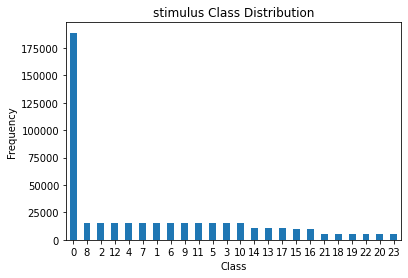

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
371162,0.4541,0.0024,0.0024,0.0024,0.0024,0.0024,0.0903,0.2490,0.0024,0.0610,0,0,0,0
315178,0.6226,0.0024,0.0024,0.0024,0.0024,0.0024,0.0635,0.4590,0.0024,0.0024,8,8,8,8
403691,0.0024,0.0024,0.0024,0.0024,0.0146,0.0244,0.0562,0.0024,0.0073,0.0586,7,7,18,18
160736,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0146,0.0024,0.0024,0,0,0,0
126914,0.3125,0.3003,4.6582,0.4541,0.1001,0.1929,2.7441,0.8008,0.8423,1.9360,1,1,4,4


In [12]:
raw_data.shape

(352081, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352081 entries, 0 to 456827
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          352081 non-null  float64
 1   Emg2          352081 non-null  float64
 2   Emg3          352081 non-null  float64
 3   Emg4          352081 non-null  float64
 4   Emg5          352081 non-null  float64
 5   Emg6          352081 non-null  float64
 6   Emg7          352081 non-null  float64
 7   Emg8          352081 non-null  float64
 8   Emg9          352081 non-null  float64
 9   Emg10         352081 non-null  float64
 10  repetition    352081 non-null  int64  
 11  rerepetition  352081 non-null  int64  
 12  stimulus      352081 non-null  int64  
 13  restimulus    352081 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 40.3 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# Scalling Data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X = StandardScaler().fit_transform(X)

# Indipendent Component Analysis (ICA)

https://www.nmr.mgh.harvard.edu/mne/0.14/manual/preprocessing/ica.html

In [18]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=10)
X_ica = ica.fit_transform(X)

In [19]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

In [20]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
y_pred1 = tree.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 80.01050882599372


Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     37336
           1       0.73      0.72      0.72      2041
           2       0.71      0.68      0.69      1801
           3       0.69      0.67      0.68      1808
           4       0.72      0.73      0.73      1649
           5       0.63      0.64      0.63      1852
           6       0.70      0.71      0.70      1782
           7       0.56      0.57      0.56      2039
           8       0.53      0.53      0.53      1792
           9       0.56      0.58      0.57      1670
          10       0.66      0.67      0.67      1657
          11       0.65      0.67      0.66      1863
          12       0.68      0.65      0.66      1955
          13       0.72      0.71      0.71      1339
          14       0.65      0.65      0.65      1283
          15       0.74      0.73      0.73      1165
          16       0.73      0.71      0.72      1370
 

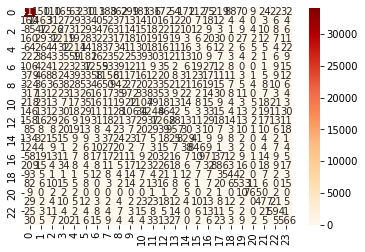

In [23]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [24]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 1.5363903602823181
MSE: 17.21382620673985
RMSE: 4.148954833056133


In [25]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.8003373375434711
Recall Score :  0.8001050882599372
f1_score :  0.8001825786018599


# KNeighborsClassifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 88.38774727693597


Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     37336
           1       0.86      0.84      0.85      2041
           2       0.89      0.82      0.85      1801
           3       0.87      0.79      0.83      1808
           4       0.87      0.85      0.86      1649
           5       0.83      0.74      0.78      1852
           6       0.87      0.83      0.85      1782
           7       0.76      0.68      0.72      2039
           8       0.81      0.63      0.71      1792
           9       0.82      0.65      0.73      1670
          10       0.88      0.77      0.82      1657
          11       0.88      0.78      0.83      1863
          12       0.83      0.76      0.79      1955
          13       0.90      0.83      0.86      1339
          14       0.83      0.71      0.77      1283
          15       0.91      0.80      0.86      1165
          16       0.93      0.82      0.87      1370
 

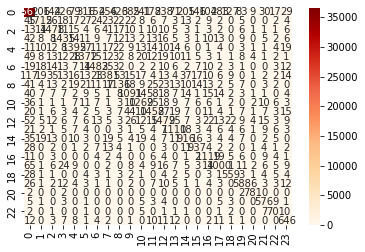

In [29]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [30]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.9335245750315975
MSE: 10.718207251089936
RMSE: 3.273867323379177


In [31]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.8817579336210429
Recall Score :  0.8838774727693597
f1_score :  0.8804316070054081


# ExtraTreesClassifier

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)

ExtraTreesClassifier()

In [33]:
y_pred5 = extratree.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 91.1186219236832


Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.99      0.94     37336
           1       0.93      0.87      0.90      2041
           2       0.95      0.87      0.90      1801
           3       0.93      0.82      0.87      1808
           4       0.94      0.88      0.91      1649
           5       0.89      0.78      0.83      1852
           6       0.91      0.88      0.90      1782
           7       0.86      0.74      0.79      2039
           8       0.90      0.70      0.79      1792
           9       0.88      0.70      0.78      1670
          10       0.93      0.81      0.87      1657
          11       0.91      0.83      0.87      1863
          12       0.90      0.83      0.86      1955
          13       0.96      0.89      0.93      1339
          14       0.88      0.79      0.83      1283
          15       0.95      0.85      0.90      1165
          16       0.97      0.88      0.92      1370
 

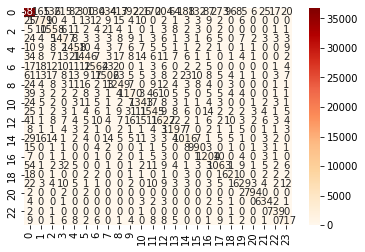

In [35]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [36]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.7496627234900664
MSE: 8.750628399392193
RMSE: 2.9581461085267904


In [37]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.9114829724599469
Recall Score :  0.911186219236832
f1_score :  0.9088961879068176


# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 90.22253149097519


Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     37336
           1       0.91      0.86      0.88      2041
           2       0.93      0.85      0.89      1801
           3       0.92      0.81      0.86      1808
           4       0.92      0.87      0.89      1649
           5       0.89      0.75      0.82      1852
           6       0.89      0.87      0.88      1782
           7       0.83      0.71      0.76      2039
           8       0.88      0.66      0.75      1792
           9       0.86      0.68      0.76      1670
          10       0.92      0.80      0.85      1657
          11       0.89      0.81      0.84      1863
          12       0.87      0.81      0.84      1955
          13       0.93      0.87      0.90      1339
          14       0.87      0.78      0.82      1283
          15       0.94      0.83      0.88      1165
          16       0.96      0.85      0.90      1370
 

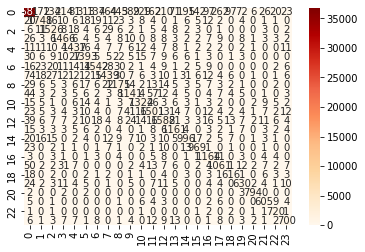

In [41]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [42]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.8000340826788985
MSE: 9.165940042887371
RMSE: 3.027530353751614


In [43]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.9017458285820004
Recall Score :  0.9022253149097519
f1_score :  0.8993754410427577


# XGBoost

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:08:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [45]:
y_pred4 = xgb.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 85.3913117571041


Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     37336
           1       0.82      0.78      0.80      2041
           2       0.85      0.75      0.80      1801
           3       0.84      0.72      0.78      1808
           4       0.84      0.76      0.80      1649
           5       0.77      0.65      0.70      1852
           6       0.79      0.77      0.78      1782
           7       0.73      0.59      0.65      2039
           8       0.75      0.54      0.62      1792
           9       0.78      0.56      0.65      1670
          10       0.86      0.72      0.79      1657
          11       0.76      0.68      0.72      1863
          12       0.77      0.69      0.73      1955
          13       0.85      0.75      0.80      1339
          14       0.77      0.70      0.73      1283
          15       0.86      0.79      0.82      1165
          16       0.86      0.75      0.80      1370
 

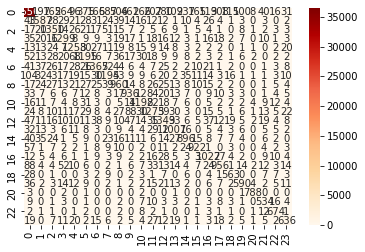

In [47]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [48]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 1.148217049860119
MSE: 13.019412925855972
RMSE: 3.608242359633839


In [49]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.849115254295171
Recall Score :  0.853913117571041
f1_score :  0.8481201934798402
